In [1]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, Flatten, Dropout, MaxPooling2D
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import numpy as np
import matplotlib.pyplot as plt

In [2]:
import os 
main_dir = "D:\COVID_dataset\datasets-master\Data"
train_dir =os.path.join(main_dir,'train')
test_dir = os.path.join(main_dir,'test')
train_covid_dir = os.path.join(train_dir,'COVID19')
train_normal_dir = os.path.join(train_dir,'NORMAL')
test_covid_dir = os.path.join(test_dir,'COVID19')
test_normal_dir = os.path.join(test_dir,'NORMAL')

In [3]:
print(train_dir,train_covid_dir)

D:\COVID_dataset\datasets-master\Data\train D:\COVID_dataset\datasets-master\Data\train\COVID19


In [4]:
train_covid_names = os.listdir(train_covid_dir)
print(train_covid_names[:10])

train_normal_names = os.listdir(train_normal_dir)
print(train_normal_names[:10])

test_covid_names = os.listdir(test_covid_dir)
print(test_covid_names[:10])

test_normal_names = os.listdir(test_normal_dir)
print(test_normal_names[:10])

['COVID-19 (1).jpeg', 'COVID-19 (1).png', 'COVID-19 (10).jpeg', 'COVID-19 (101).jpg', 'COVID-19 (107).jpg', 'COVID-19 (11).jpeg', 'COVID-19 (11).jpg', 'COVID-19 (12).jpeg', 'COVID-19 (12).jpg', 'COVID-19 (13).jpeg']
['NORMAL(0).jpg', 'NORMAL(1).jpg', 'NORMAL(100).jpg', 'NORMAL(1000).jpg', 'NORMAL(1002).jpg', 'NORMAL(1005).jpg', 'NORMAL(1006).jpg', 'NORMAL(1007).jpg', 'NORMAL(1008).jpg', 'NORMAL(1009).jpg']
['COVID-19 (313).jpg', 'COVID-19 (353).jpg', 'COVID-19 (371).jpg', 'COVID-19 (425).jpg', 'COVID-19 (439).jpg', 'COVID-19 (457).jpg', 'COVID-19 (461).jpg', 'COVID-19 (475).jpg', 'COVID-19 (479).jpg', 'COVID-19 (485).jpg']
['NORMAL(10).jpg', 'NORMAL(1001).jpg', 'NORMAL(1003).jpg', 'NORMAL(1004).jpg', 'NORMAL(1011).jpg', 'NORMAL(1012).jpg', 'NORMAL(1015).jpg', 'NORMAL(1017).jpg', 'NORMAL(1020).jpg', 'NORMAL(1022).jpg']


In [5]:
print("train dataset covid images :",len(train_covid_names))
print("train dataset normal images :",len(train_normal_names))
print("test dataset covid images :",len(test_covid_names))
print("test dataset normal images :",len(test_normal_names))
print("Total train images :",len(train_covid_names+train_normal_names))
print("Total test images :",len(test_covid_names+test_normal_names))

train dataset covid images : 545
train dataset normal images : 1266
test dataset covid images : 167
test dataset normal images : 317
Total train images : 1811
Total test images : 484


['D:\\COVID_dataset\\datasets-master\\Data\\train\\COVID19\\COVID-19 (1).jpeg', 'D:\\COVID_dataset\\datasets-master\\Data\\train\\COVID19\\COVID-19 (1).png', 'D:\\COVID_dataset\\datasets-master\\Data\\train\\COVID19\\COVID-19 (10).jpeg', 'D:\\COVID_dataset\\datasets-master\\Data\\train\\COVID19\\COVID-19 (101).jpg', 'D:\\COVID_dataset\\datasets-master\\Data\\train\\COVID19\\COVID-19 (107).jpg', 'D:\\COVID_dataset\\datasets-master\\Data\\train\\COVID19\\COVID-19 (11).jpeg', 'D:\\COVID_dataset\\datasets-master\\Data\\train\\COVID19\\COVID-19 (11).jpg', 'D:\\COVID_dataset\\datasets-master\\Data\\train\\COVID19\\COVID-19 (12).jpeg']
['D:\\COVID_dataset\\datasets-master\\Data\\train\\NORMAL\\NORMAL(0).jpg', 'D:\\COVID_dataset\\datasets-master\\Data\\train\\NORMAL\\NORMAL(1).jpg', 'D:\\COVID_dataset\\datasets-master\\Data\\train\\NORMAL\\NORMAL(100).jpg', 'D:\\COVID_dataset\\datasets-master\\Data\\train\\NORMAL\\NORMAL(1000).jpg', 'D:\\COVID_dataset\\datasets-master\\Data\\train\\NORMAL\\NOR

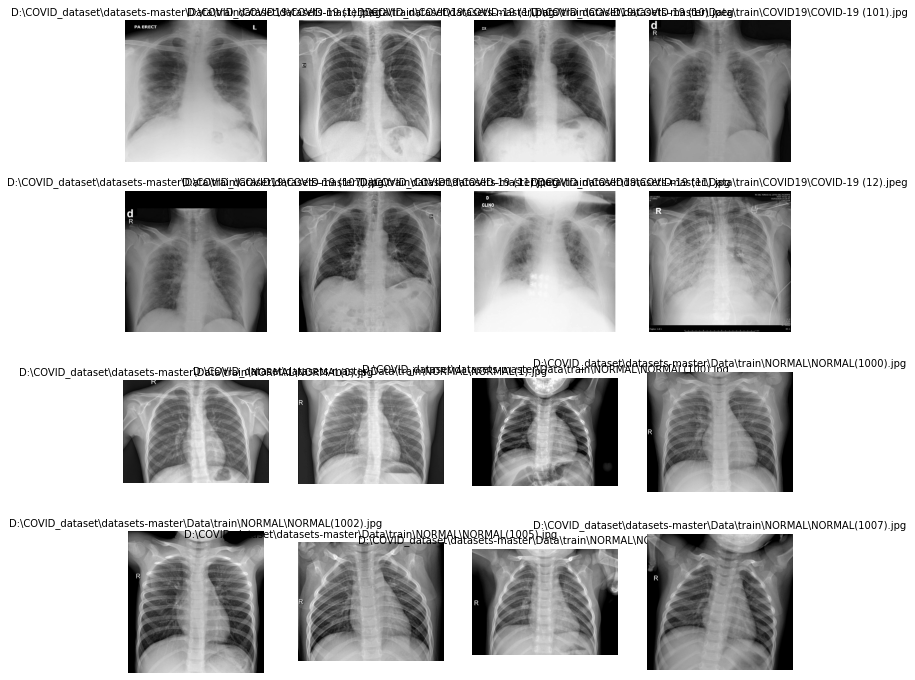

In [7]:
#lets plot a grid of 16 images (8 images of Covid19 and 8 images of Normal) 


import matplotlib.pyplot as plt
import matplotlib.image as mpimg

#set the number of columns and rows
nrows = 4
ncols = 4

#set the figure size
fig = plt.gcf()
fig.set_size_inches(12,12)

#get the filenames from the covid & normal dir of the train dataset
next_covid_pic = [os.path.join(train_covid_dir,fname)for fname in train_covid_names[0:8]]
next_normal_pic = [os.path.join(train_normal_dir,fname)for fname in train_normal_names[0:8]]

#print the list
print(next_covid_pic)
print(next_normal_pic)

for i , img_path in enumerate(next_covid_pic+next_normal_pic):
    data = img_path.split('/',6)[-1]
    sp =plt.subplot(nrows,ncols,i+1)
    sp.axis('Off')
    img = mpimg.imread(img_path)
    sp.set_title(data,fontsize=10)
    plt.imshow(img,cmap='gray')
plt.show()

In [8]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
# Generator for our training data
train_datagen = ImageDataGenerator(rescale = 1./255,
                                   validation_split = 0.2,
                                   zoom_range = 0.2,
                                   horizontal_flip = True)                               

# Generator for our validation data
validation_datagen = ImageDataGenerator(rescale = 1./255)

# Generator for our test data
test_datagen = ImageDataGenerator(rescale = 1./255)

train_generator = train_datagen.flow_from_directory(train_dir ,
                                                    target_size = (150,150),
                                                    subset = 'training',
                                                    batch_size = 32,
                                                    class_mode = 'binary')

validation_generator = train_datagen.flow_from_directory(train_dir ,
                                                    target_size = (150,150),
                                                    subset = 'validation',
                                                    batch_size = 32,
                                                    class_mode = 'binary')

test_generator = test_datagen.flow_from_directory(test_dir ,
                                                    target_size = (150,150),
                                                    batch_size = 32,
                                                    class_mode = 'binary')

Found 1449 images belonging to 2 classes.
Found 362 images belonging to 2 classes.
Found 484 images belonging to 2 classes.


In [9]:
train_generator.class_indices

{'COVID19': 0, 'NORMAL': 1}

In [10]:
train_generator.image_shape

(150, 150, 3)

In [11]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, Flatten, Dropout, MaxPooling2D

model = Sequential()

# add the convolutional layer
# filters, size of filters,padding,activation_function,input_shape
model.add(Conv2D(32,(5,5),padding='SAME',activation='relu',input_shape=(150,150,3)))
# pooling layer
model.add(MaxPooling2D(pool_size=(2,2)))
# place a dropout layer
model.add(Dropout(0.5))
# add another convolutional layer
model.add(Conv2D(64,(5,5),padding='SAME',activation='relu'))

# pooling layer
model.add(MaxPooling2D(pool_size=(2,2)))

# place a dropout layer
model.add(Dropout(0.5))

# Flatten the image to 1 dimensional array
model.add(Flatten())
# add a dense layer : amount of nodes, activation
model.add(Dense(256,activation='relu'))
# place a dropout layer
# 0.5 drop out rate is recommended, half input nodes will be dropped at each update
model.add(Dropout(0.5))
model.add(Dense(1,activation='sigmoid'))
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 150, 150, 32)      2432      
                                                                 
 max_pooling2d (MaxPooling2D  (None, 75, 75, 32)       0         
 )                                                               
                                                                 
 dropout (Dropout)           (None, 75, 75, 32)        0         
                                                                 
 conv2d_1 (Conv2D)           (None, 75, 75, 64)        51264     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 37, 37, 64)       0         
 2D)                                                             
                                                                 
 dropout_1 (Dropout)         (None, 37, 37, 64)        0

In [12]:
#compile the model
from tensorflow.keras.optimizers import Adam
model.compile(Adam(lr = 0.001),loss='binary_crossentropy',metrics=['accuracy'])


In [13]:
#train the model
history = model.fit(train_generator,
                              epochs=20,
                              validation_data = validation_generator,
                              validation_steps = 10)

Epoch 1/20
46/46 [==============================] - 128s 3s/step - loss: 1.4036 - accuracy: 0.6404 - val_loss: 0.4027 - val_accuracy: 0.8719
Epoch 2/20
46/46 [==============================] - 105s 2s/step - loss: 0.3415 - accuracy: 0.8392 - val_loss: 0.2503 - val_accuracy: 0.9156
Epoch 3/20
46/46 [==============================] - 83s 2s/step - loss: 0.2621 - accuracy: 0.8910 - val_loss: 0.2424 - val_accuracy: 0.9563
Epoch 4/20
46/46 [==============================] - 84s 2s/step - loss: 0.2606 - accuracy: 0.8999 - val_loss: 0.2260 - val_accuracy: 0.9563
Epoch 5/20
46/46 [==============================] - 85s 2s/step - loss: 0.1844 - accuracy: 0.9303 - val_loss: 0.1756 - val_accuracy: 0.9500
Epoch 6/20
46/46 [==============================] - 81s 2s/step - loss: 0.1728 - accuracy: 0.9420 - val_loss: 0.1496 - val_accuracy: 0.9469
Epoch 7/20
46/46 [==============================] - 81s 2s/step - loss: 0.1697 - accuracy: 0.9393 - val_loss: 0.1595 - val_accuracy: 0.9594
Epoch 8/20
46/46 [

In [15]:
history.history.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

Text(0.5, 0, 'epoch')

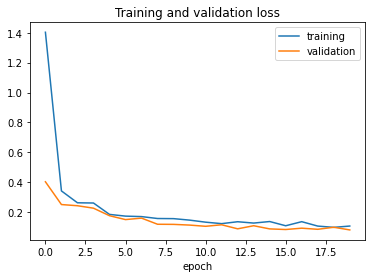

In [16]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.legend(['training','validation'])
plt.title('Training and validation loss')
plt.xlabel('epoch')

Text(0.5, 0, 'epoch')

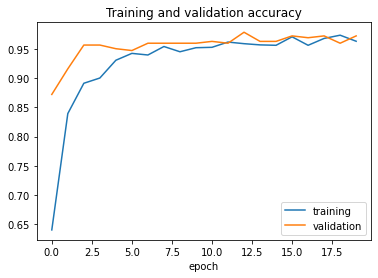

In [17]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.legend(['training','validation'])
plt.title('Training and validation accuracy')
plt.xlabel('epoch')

In [18]:
test_loss , test_acc = model.evaluate(test_generator)
print('test acc :{} test loss:{}'.format(test_acc,test_loss))

16/16 [==============================] - 18s 1s/step - loss: 0.0945 - accuracy: 0.9607
test acc :0.96074378490448 test loss:0.09449154883623123


In [19]:
model.save('COVID19-model.h5')

In [20]:
model

In [21]:
#test your model with some images from your local computer to predict whether a patient is affected by COVID19 or not.


In [21]:
import numpy as np
from pathlib import Path
from keras.preprocessing import image

p = Path(r'D:\COVIDDATA\New folder\datasets-master\Data\train\NORMAL')
for i in p.iterdir():
    print(i)

images = np.vstack([P])
classes = model.predict(images,batch_size=10)
#print(i)
if classes==0:
    print('Covid19')
else:
    print('Normal')

D:\COVIDDATA\New folder\datasets-master\Data\train\NORMAL\NORMAL(0).jpg
D:\COVIDDATA\New folder\datasets-master\Data\train\NORMAL\NORMAL(1).jpg
D:\COVIDDATA\New folder\datasets-master\Data\train\NORMAL\NORMAL(11).jpg
D:\COVIDDATA\New folder\datasets-master\Data\train\NORMAL\NORMAL(12).jpg
D:\COVIDDATA\New folder\datasets-master\Data\train\NORMAL\NORMAL(13).jpg
D:\COVIDDATA\New folder\datasets-master\Data\train\NORMAL\NORMAL(14).jpg
D:\COVIDDATA\New folder\datasets-master\Data\train\NORMAL\NORMAL(15).jpg
D:\COVIDDATA\New folder\datasets-master\Data\train\NORMAL\NORMAL(16).jpg
D:\COVIDDATA\New folder\datasets-master\Data\train\NORMAL\NORMAL(17).jpg
D:\COVIDDATA\New folder\datasets-master\Data\train\NORMAL\NORMAL(19).jpg
D:\COVIDDATA\New folder\datasets-master\Data\train\NORMAL\NORMAL(2).jpg
D:\COVIDDATA\New folder\datasets-master\Data\train\NORMAL\NORMAL(20).jpg
D:\COVIDDATA\New folder\datasets-master\Data\train\NORMAL\NORMAL(21).jpg
D:\COVIDDATA\New folder\datasets-master\Data\train\NOR

NameError: name 'P' is not defined